# Student Information
Daniel Power  
201244498

# Graphs and Analysis

## Imports and Utilities

In [2]:
import os
import subprocess
import matplotlib.pyplot as plt

SAMPLE_SIZE=10
FIGURE_SIZE=(8,6)

def gale_shapley(input):
    pipe = subprocess.run(['stack', 'run', 'galeShapley'], capture_output=True, text=True, input=input)
    return pipe.stdout

def gale_shapley_rounds(input):
    return int(gale_shapley(input).split('\n')[0])

def get_averages(parameters, samples):
    averages = {}
    for parameter in parameters:
        n, k = parameter
        total = 0
        for _ in range(samples):
            generated_input = os.popen(f'stack run generate {n} {k}').read()
            total += gale_shapley_rounds(generated_input)
        averages[parameter] = total/samples
    return averages

## Ensure binaries are built

The build output may appear with a red background. This is normal and does not indicate an error.
On subsequent runs, there may be no output. This is normal since Stack will only build if the binary does not exist, or the source files have been modified. So this will only have an affect on the first run.

In [30]:
os.popen('stack build').read();

## Example usage

In [4]:
sample_input = os.popen('stack run generate 5 3').read()
print(sample_input);

5
3

1 2 0 4 3
4 2 1 0 3
0 2 1 3 4

4 3 2 1 0
3 2 0 4 1
1 2 3 4 0

1 0 2 1 2

1 1 0 2 0



Note that the output of my Gale Shapley algorithm does not perfectly match the output noted in the assignment requirements. This is because my algorithm works entirely through standard input/output. So I needed to include the round count in the output in order to use it in my statistics.

In [5]:
print(gale_shapley(sample_input))

12
0 1
1 3
2 0
3 4
4 2



## Generate inputs for n,k=20..200 in increments of 10

In [6]:
parameters = [(i, i) for i in range(20, 210, 10)]
variable_n_k_averages = get_averages(parameters, SAMPLE_SIZE)

## Generate inputs for n=20..200, k=10 in increments of 10

In [7]:
n_values = [i for i in range(20, 210, 10)]
parameters = list(zip(n_values, [10]*len(n_values)))
variable_n_averages = get_averages(parameters, SAMPLE_SIZE)

## Graph of k=n vs k=10 where n=20..200

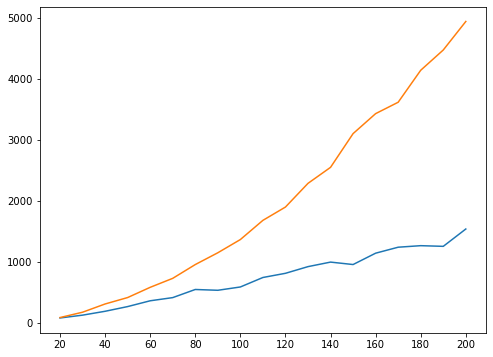

In [24]:
variable_n_k_pairs = [(n, v) for ((n, _), v) in variable_n_k_averages.items()]
variable_n_pairs = [(n, v) for ((n, _), v) in variable_n_averages.items()]

combined_pairs = []
for i in range(len(variable_n_k_pairs)):
    n, v1 = variable_n_k_pairs[i]
    _, v2 = pair = variable_n_pairs[i]
    combined_pairs.append((n, (v1, v2)))
x, y = zip(*combined_pairs)
plt.figure(figsize=FIGURE_SIZE)
plt.plot(x, y)
plt.xticks(range(20, 210, 20))
plt.show()

## Observations

Repeated preference lists appear to result in a significant increase in the number of rounds required to form a stable matching.

## Generate inputs for n=200, k=10..200 in increments of 10

In [25]:
k_values = [i for i in range(10, 210, 10)]
parameters = list(zip([200]*len(k_values), k_values))
variable_k_averages = get_averages(parameters, SAMPLE_SIZE)

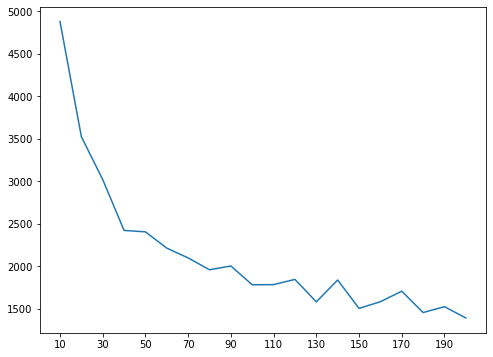

In [29]:
variable_k_pairs = [(k, v) for ((_, k), v) in variable_k_averages.items()]
x, y = zip(*variable_k_pairs)
plt.figure(figsize=FIGURE_SIZE)
plt.plot(x, y)
plt.xticks(range(10, 210, 20))
plt.show()

## Observations

This result further enforces the idea that repeated preference lists increases the number of rounds required.

I suspect this is because hospitals that share a preference list will always propose to students in the same order as each other. Which will result in a higher rate of students switching hospitals.

To exaggerate this, let's look at the extreme case where there exists only one preference list which is used by all hospitals. In this scenario, every hospital would propose to the same student. That student would have to reject all but 1 hospital before any hospitals propose to the next student. The same would occur for the second student but with n-1 hospitals, and the third student with n-2 hospitals, and so on.